# Predict shapes

In [1]:
import sys
sys.path.insert(0, "..")
import os
from glob import glob
import natsort
import json
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
from pathlib import Path
import shutil
import torch
import torch.nn as nn

from sklearn.metrics import confusion_matrix
from PIL import Image

In [2]:
from dataloader import load_images, load_masks, mask2rgb, rgb2mask, get_image_names
from lib import compose_image, plot_patches, input_filled_mirroring
from model import UNet, make_dataloaders, IoU, UnetFracture

In [3]:
PATH_PARAMETERS = '../params.json'

with open(PATH_PARAMETERS) as f:
    params = json.load(f)

model_params = params['shape_segmentation']['patches_floodnet']

In [4]:
mode = 'train'
file_names = get_image_names(mode=mode)
images = load_images(file_names,mode=mode)
masks = load_masks(file_names,mode=mode)

(-0.5, 399.5, 299.5, -0.5)

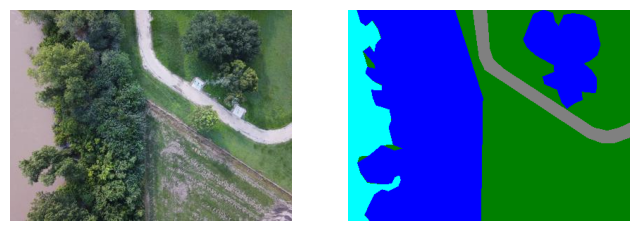

In [5]:
ix = 1

fig, ax = plt.subplots(1,2, figsize=(8,10))
ax[0].imshow(images[ix], cmap='gray')
ax[0].axis('off')
ax[1].imshow(masks[ix])
ax[1].axis('off')

In [6]:
model = UnetFracture(model_params)
model.initialize()

In [7]:
ix = 1
image = images[ix]
mask_rgb = masks[ix]
mask_labels = rgb2mask(mask_rgb).astype(int)

mask_prob = model.predict_proba(image)
mask_predict = model.predict_image(image)
mask_predict_rgb = mask2rgb(mask_predict)
class_iou, mean_iou = IoU(mask_labels, mask_predict, model_params['n_classes'])

D:\ImageSegmentation\unet-multiclass-pytorch\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


Class IoU: nan 0.000 0.816 nan 0.542 0.000 0.828 0.000 0.000 0.699   |  Mean IoU: 0.360


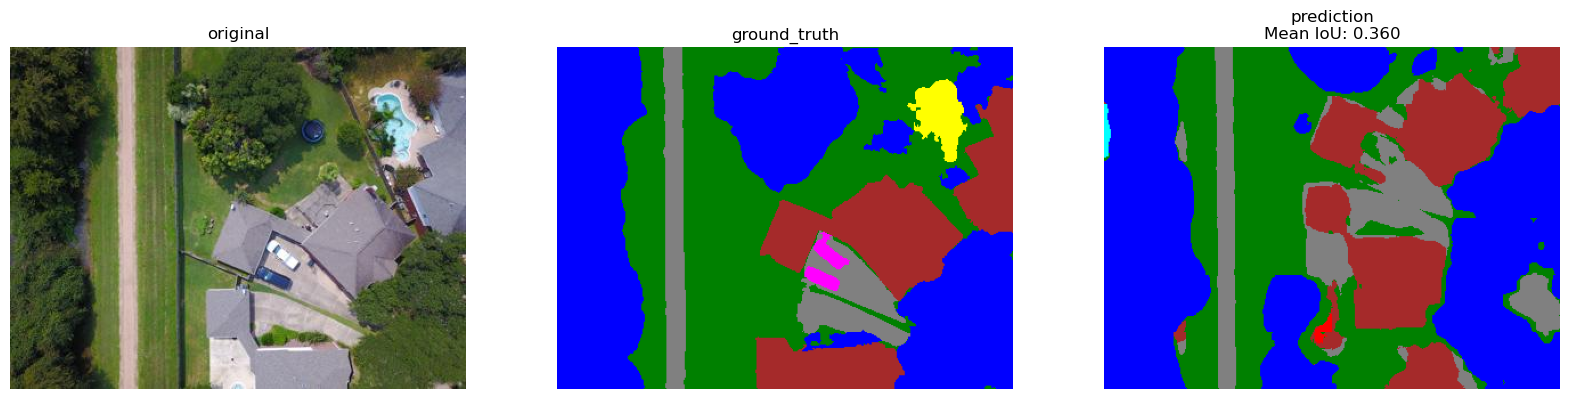

In [23]:
fig, ax = plt.subplots(1,3,figsize=(20,7))
ax[0].imshow(image)
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(mask_rgb)
ax[1].set_title('ground_truth')
ax[1].axis('off')
ax[2].imshow(mask_predict_rgb)
ax[2].set_title(f'prediction\nMean IoU: {mean_iou:.3f}')
ax[2].axis('off')

print('Class IoU:', ' '.join(f'{x:.3f}' for x in class_iou), f'  |  Mean IoU: {mean_iou:.3f}')

Class IoU: nan 0.000 0.816 nan 0.542 0.000 0.828 0.000 0.000 0.699   |  Mean IoU: 0.360


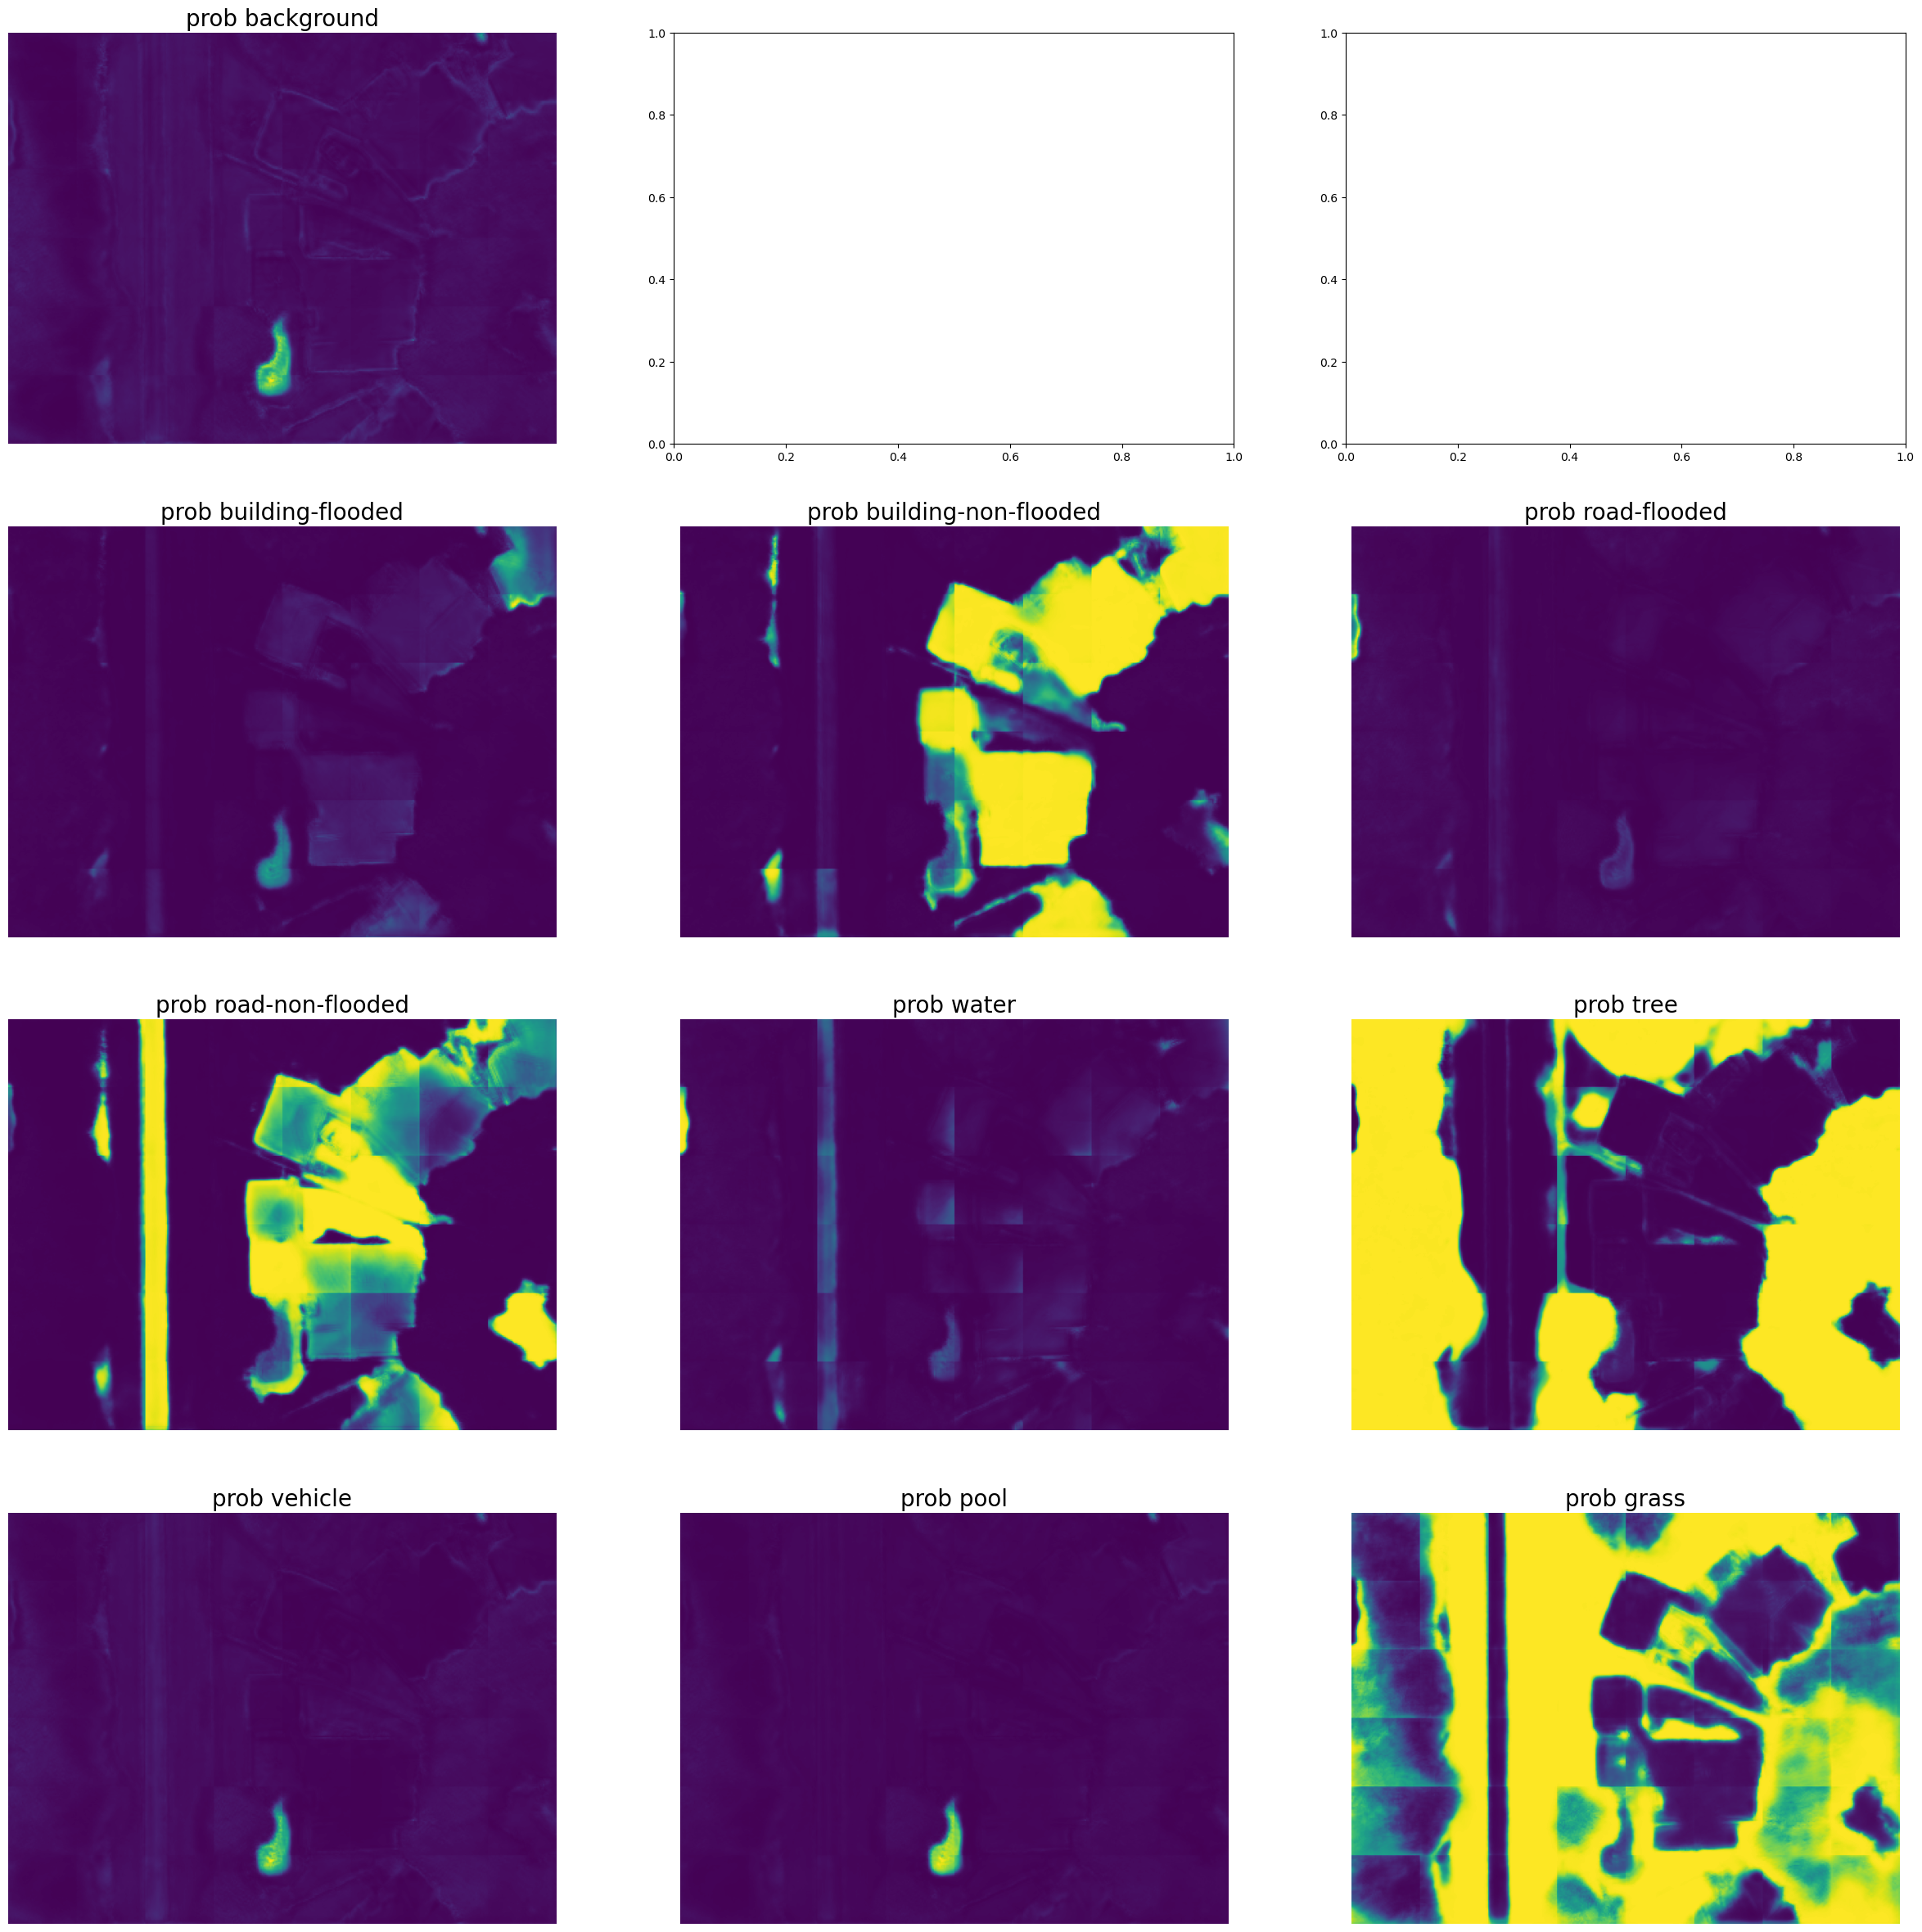

In [24]:
fig, ax = plt.subplots(4,3,figsize=(30,30))
ax[0][0].imshow(mask_prob[:,:,0])
ax[0][0].set_title('prob background', fontsize=20)
ax[0][0].axis('off')
ax[1][0].imshow(mask_prob[:,:,1])
ax[1][0].set_title('prob building-flooded', fontsize=20)
ax[1][0].axis('off')
ax[1][1].imshow(mask_prob[:,:,2])
ax[1][1].set_title('prob building-non-flooded', fontsize=20)
ax[1][1].axis('off')
ax[1][2].imshow(mask_prob[:,:,3])
ax[1][2].set_title('prob road-flooded', fontsize=20)
ax[1][2].axis('off')
ax[2][0].imshow(mask_prob[:,:,4])
ax[2][0].set_title('prob road-non-flooded', fontsize=20)
ax[2][0].axis('off')
ax[2][1].imshow(mask_prob[:,:,5])
ax[2][1].set_title('prob water', fontsize=20)
ax[2][1].axis('off')
ax[2][2].imshow(mask_prob[:,:,6])
ax[2][2].set_title('prob tree', fontsize=20)
ax[2][2].axis('off')
ax[3][0].imshow(mask_prob[:,:,7])
ax[3][0].set_title('prob vehicle', fontsize=20)
ax[3][0].axis('off')
ax[3][1].imshow(mask_prob[:,:,8])
ax[3][1].set_title('prob pool', fontsize=20)
ax[3][1].axis('off')
ax[3][2].imshow(mask_prob[:,:,9])
ax[3][2].set_title('prob grass', fontsize=20)
ax[3][2].axis('off')

print('Class IoU:', ' '.join(f'{x:.3f}' for x in class_iou), f'  |  Mean IoU: {mean_iou:.3f}')

In [ ]:
m_ious = []
cf_ious = []

for i, (image,mask_rgb) in enumerate(zip(images,masks)):
    
    mask_labels = rgb2mask(mask_rgb).astype(int)
    mask_prob = model.predict_proba(image)
    mask_predict = model.predict_image(image)
    mask_predict_rgb = mask2rgb(mask_predict)
    
    class_iou, mean_iou = IoU(mask_labels, mask_predict, model_params['n_classes'])
    
    m_ious.append(mean_iou)
    
    
    print(f'{i}: Class IoU:', ' '.join(f'{x:.3f}' for x in class_iou), f'  |  Mean IoU: {mean_iou:.3f}')
#     plot_results(img, img_bin, mask_rgb, img_prob, sines) 

In [25]:
print(np.mean(m_ious))

0.44844487506314956
